<a href="https://colab.research.google.com/github/CaptKeroro/CaptKeroro/blob/main/prediksiPenyakitJantung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama: I Putu Eka Surya Gempita
## Kelas: Machine Learning Untuk Pemula
##Project Akhir: Prediksi Penyakit Jantung

link google drive: https://drive.google.com/file/d/1WIARP5ZASHPAjyvV_-gfMVWJn36amlLO/view?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.svm import SVC

# 1. Import Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Colab Notebooks/dataset/penyakit jantung/heartDisease.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv(file_path, index_col=0)
df

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
0,63,Laki-laki,Asymptomatic,145,233,1,0,150,0,2.3,Upsloping,0,1,Jantung
1,37,Laki-laki,Non-anginal pain,130,250,0,1,187,0,3.5,Upsloping,0,2,Jantung
2,41,Perempuan,Atypical angina,130,204,0,0,172,0,1.4,Downslopins,0,2,Jantung
3,56,Laki-laki,Atypical angina,120,236,0,1,178,0,0.8,Downslopins,0,2,Jantung
4,57,Perempuan,Typical angina,120,354,0,1,163,1,0.6,Downslopins,0,2,Jantung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Perempuan,Typical angina,140,241,0,1,123,1,0.2,Flatsloping,0,3,Normal
299,45,Laki-laki,Asymptomatic,110,264,0,1,132,0,1.2,Flatsloping,0,3,Normal
300,68,Laki-laki,Typical angina,144,193,1,1,141,0,3.4,Flatsloping,2,3,Normal
301,57,Laki-laki,Typical angina,130,131,0,1,115,1,1.2,Flatsloping,1,3,Normal


In [4]:
df.shape

(303, 14)

In [5]:
df.diagnosis.value_counts()

,count
diagnosis,
Jantung,165
Normal,138


# 2. Cleaning Data

In [6]:
df.isnull().sum()

,0
usia,0
jenis kelamin,0
nyeri dada,0
trestbps,0
cholestoral,0
fasting blood sugar,0
restecg,0
denyut jantung,0
exang,0
oldpeak,0


In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

np.int64(0)

# 3. Exploratory Data Analysis (EDA)

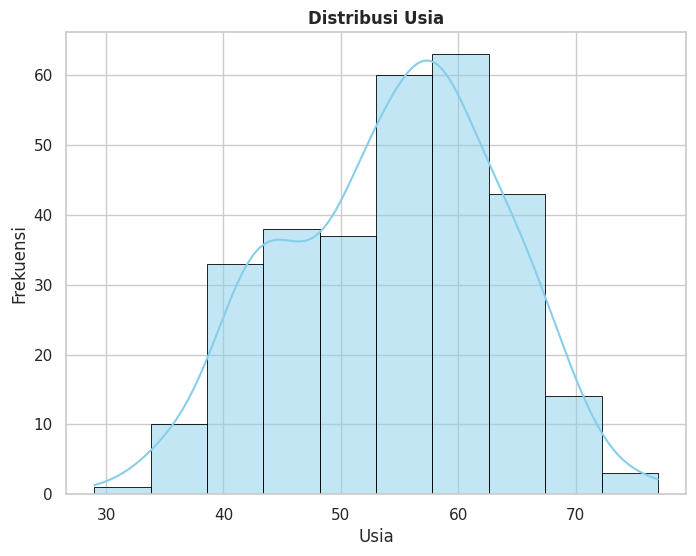

In [10]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.histplot(
    data=df,
    x='usia',
    bins=10,
    kde=True,
    color='skyblue',
    edgecolor='black',
    linewidth=0.6
)

plt.title('Distribusi Usia', fontweight='bold')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

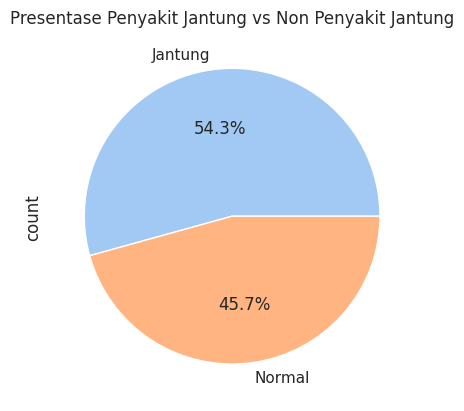

In [11]:
sns.set_palette('pastel')
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Presentase Penyakit Jantung vs Non Penyakit Jantung')
plt.show()

# 4. Preparation Data

In [12]:
from sklearn.preprocessing import LabelEncoder

jk_encoder = LabelEncoder()
nd_encoder = LabelEncoder()
s_encoder = LabelEncoder()

df['jenis kelamin'] = jk_encoder.fit_transform(df['jenis kelamin'])
df['nyeri dada'] = nd_encoder.fit_transform(df['nyeri dada'])
df['slope'] = s_encoder.fit_transform(df['slope'])
df['diagnosis'] = df['diagnosis'].map({'Jantung': 1, 'Normal': 0})

<ipython-input-12-a3b349cad381>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['jenis kelamin'] = jk_encoder.fit_transform(df['jenis kelamin'])
<ipython-input-12-a3b349cad381>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nyeri dada'] = nd_encoder.fit_transform(df['nyeri dada'])
<ipython-input-12-a3b349cad381>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [13]:
df

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
0,63,0,0,145,233,1,0,150,0,2.3,2,0,1,1
1,37,0,2,130,250,0,1,187,0,3.5,2,0,2,1
2,41,1,1,130,204,0,0,172,0,1.4,0,0,2,1
3,56,0,1,120,236,0,1,178,0,0.8,0,0,2,1
4,57,1,3,120,354,0,1,163,1,0.6,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,1,3,140,241,0,1,123,1,0.2,1,0,3,0
299,45,0,0,110,264,0,1,132,0,1.2,1,0,3,0
300,68,0,3,144,193,1,1,141,0,3.4,1,2,3,0
301,57,0,3,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']

print(X.shape)
print(y.shape)

(302, 13)
(302,)


In [15]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Modeling & Evaluation (SVM, KNN, Decision Tree)

In [17]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(kernel='linear')
}

In [18]:
result = []
for model_name, model in models.items():
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred, output_dict=True)

  result.append({
      'Model': model_name,
      'Accuracy': accuracy,
      'Precision': report['weighted avg']['precision'],
      'Recall': report['weighted avg']['recall'],
      'F1-Score': report['weighted avg']['f1-score']
  })

result_df = pd.DataFrame(result)
result_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.835165,0.837458,0.835165,0.835404
1,K-Nearest Neighbors,0.846154,0.849870,0.846154,0.846377
2,Support Vector Machine,0.824176,0.824176,0.824176,0.824176


# 6. Testing

In [19]:
df.sample(5)

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
24,40,0,0,140,199,0,1,178,1,1.4,0,0,3,1
108,50,1,1,120,244,0,1,162,0,1.1,0,0,2,1
287,57,0,1,154,232,0,0,164,0,0.0,0,1,2,0
103,42,0,2,120,240,1,1,194,0,0.8,2,0,3,1
55,52,0,1,134,201,0,1,158,0,0.8,0,1,2,1


In [20]:
# sample data
new_data = pd.DataFrame({
    'usia': [57],
    'jenis kelamin': ["Perempuan"],
    'nyeri dada': ["Atypical angina"],
    'trestbps': [130],
    'cholestoral': [230],
    'fasting blood sugar': [0],
    'restecg': [0],
    'denyut jantung': [175],
    'exang': [0],
    'oldpeak': [0.5],
    'slope': ["Flatsloping"],
    'ca': [1],
    'thalium': [2]
})

new_data

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium
0,57,Perempuan,Atypical angina,130,230,0,0,175,0,0.5,Flatsloping,1,2


In [21]:
new_data['jenis kelamin'] = jk_encoder.transform(new_data['jenis kelamin'])
new_data['nyeri dada'] = nd_encoder.transform(new_data['nyeri dada'])
new_data['slope'] = s_encoder.transform(new_data['slope'])

In [22]:
new_data

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium
0,57,1,1,130,230,0,0,175,0,0.5,1,1,2


In [23]:
new_data_scaled = scaler.transform(new_data)

for model_name, model in models.items():
  prediction = model.predict(new_data_scaled)
  hasil_prediksi = "Normal" if prediction[0] == 0 else "Jantung"
  print(f"Hasil Prediksi dengan {model_name}: {hasil_prediksi}")

Hasil Prediksi dengan Decision Tree: Normal
Hasil Prediksi dengan K-Nearest Neighbors: Jantung
Hasil Prediksi dengan Support Vector Machine: Jantung
